In [2554]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2555]:
df = pd.read_csv('TravelInsurancePrediction.csv')
df = df.drop(columns='Unnamed: 0')
yes = df[df['TravelInsurance'] == 1]
no = df[df['TravelInsurance'] == 0]

In [2556]:
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0
...,...,...,...,...,...,...,...,...,...
1982,33,Private Sector/Self Employed,Yes,1500000,4,0,Yes,Yes,1
1983,28,Private Sector/Self Employed,Yes,1750000,5,1,No,Yes,0
1984,28,Private Sector/Self Employed,Yes,1150000,6,1,No,No,0
1985,34,Private Sector/Self Employed,Yes,1000000,6,0,Yes,Yes,1


In [2557]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  1987 non-null   int64 
 1   Employment Type      1987 non-null   object
 2   GraduateOrNot        1987 non-null   object
 3   AnnualIncome         1987 non-null   int64 
 4   FamilyMembers        1987 non-null   int64 
 5   ChronicDiseases      1987 non-null   int64 
 6   FrequentFlyer        1987 non-null   object
 7   EverTravelledAbroad  1987 non-null   object
 8   TravelInsurance      1987 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 139.8+ KB


In [2558]:
df.describe()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
count,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000
mean,29.650226,9.327630e+05,4.752894,0.277806,0.357323
std,2.913308,3.768557e+05,1.609650,0.448030,0.479332
min,25.000000,3.000000e+05,2.000000,0.000000,0.000000
25%,28.000000,6.000000e+05,4.000000,0.000000,0.000000
50%,29.000000,9.000000e+05,5.000000,0.000000,0.000000
75%,32.000000,1.250000e+06,6.000000,1.000000,1.000000
max,35.000000,1.800000e+06,9.000000,1.000000,1.000000


In [2559]:
cat = df[['Employment Type','GraduateOrNot','FrequentFlyer','EverTravelledAbroad']]
cat.describe()

,Employment Type,GraduateOrNot,FrequentFlyer,EverTravelledAbroad
count,1987,1987,1987,1987
unique,2,2,2,2
top,Private Sector/Self Employed,Yes,No,No
freq,1417,1692,1570,1607


In [2560]:
df.corr()

,Age,AnnualIncome,FamilyMembers,ChronicDiseases,TravelInsurance
Age,1.000000,-0.020101,0.027409,0.007359,0.061060
AnnualIncome,-0.020101,1.000000,-0.015367,-0.001149,0.396763
FamilyMembers,0.027409,-0.015367,1.000000,0.028209,0.079909
ChronicDiseases,0.007359,-0.001149,0.028209,1.000000,0.018190
TravelInsurance,0.061060,0.396763,0.079909,0.018190,1.000000


## AGE

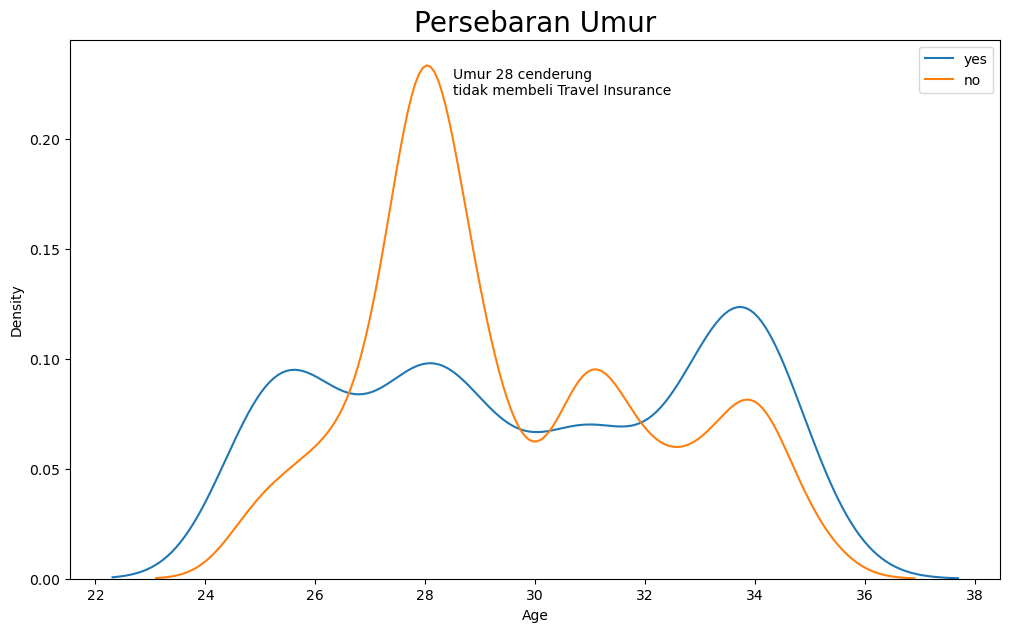

In [2561]:
plt.figure(figsize=(12,7))
plt.annotate(text='Umur 28 cenderung \ntidak membeli Travel Insurance', xy=(28.5,0.22))
sns.kdeplot(yes['Age'],label = 'yes')
sns.kdeplot(no['Age'], label = 'no')
plt.title('Persebaran Umur', fontsize=(20))
plt.legend()
plt.show()

## Employment Type

In [2562]:
dfg = df.groupby(['Employment Type','TravelInsurance'])['Age'].count().reset_index(name = 'User')
dfg_tot = df.groupby(['Employment Type'])['Age'].count().reset_index(name = 'Total')
dfg = dfg.merge(dfg_tot, how = 'inner', on = 'Employment Type')
dfg['ratio'] = dfg['User'] / dfg['Total']
dfg

,Employment Type,TravelInsurance,User,Total,ratio
0,Government Sector,0,430,570,0.754386
1,Government Sector,1,140,570,0.245614
2,Private Sector/Self Employed,0,847,1417,0.597742
3,Private Sector/Self Employed,1,570,1417,0.402258


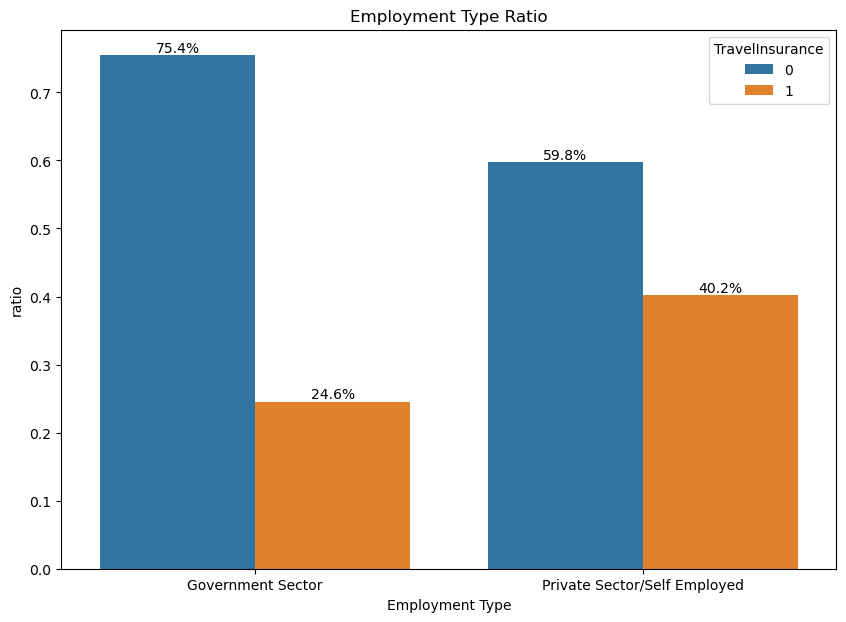

In [2563]:
plt.figure(figsize=(10,7))
for i, bar in enumerate(sns.barplot(x='Employment Type', y='ratio', hue='TravelInsurance', data=dfg).containers):
    for j, value in enumerate(bar):
        percent = value.get_height() * 100
        plt.text(value.get_x() + value.get_width() / 2, value.get_height(), f"{percent:.1f}%", ha='center', va='bottom', fontsize=10)
plt.title('Employment Type Ratio')
plt.show()

## Graduate Or Not

In [2564]:
dfg = df.groupby(['GraduateOrNot','TravelInsurance'])['Age'].count().reset_index(name='User')
dfg_tot = df.groupby(['GraduateOrNot'])['Age'].count().reset_index(name = 'Total')
dfg = dfg.merge(dfg_tot, how = 'inner', on = 'GraduateOrNot')
dfg['ratio'] = dfg['User'] / dfg['Total']
dfg

,GraduateOrNot,TravelInsurance,User,Total,ratio
0,No,0,196,295,0.664407
1,No,1,99,295,0.335593
2,Yes,0,1081,1692,0.638889
3,Yes,1,611,1692,0.361111


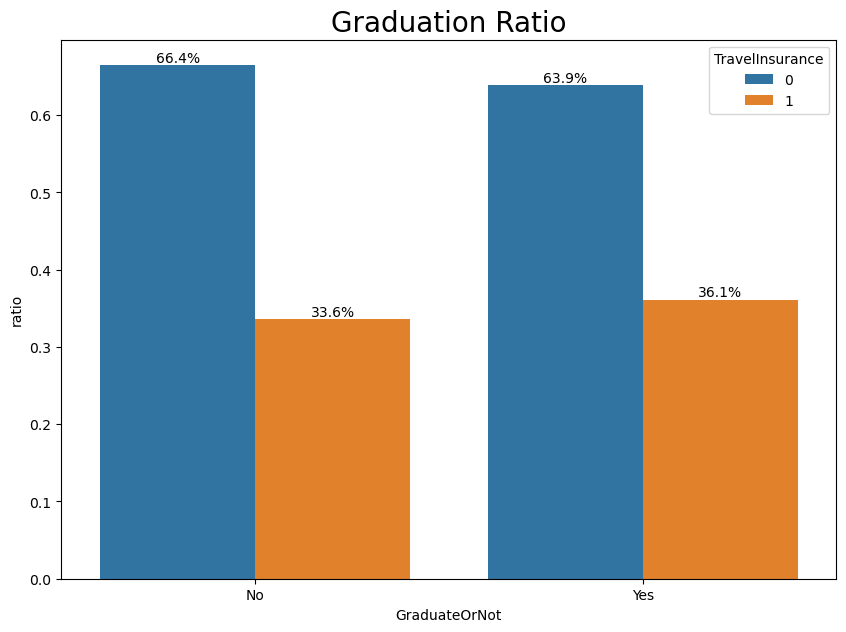

In [2565]:
plt.figure(figsize=(10,7))
for i, bar in enumerate(sns.barplot(x='GraduateOrNot', y='ratio', hue='TravelInsurance', data=dfg).containers):
    for j, value in enumerate(bar):
        percent = value.get_height() * 100
        plt.text(value.get_x() + value.get_width() / 2, value.get_height(), f"{percent:.1f}%", ha='center', va='bottom', fontsize=10)
plt.title('Graduation Ratio',fontsize=20)
plt.show()

## Annual Income 

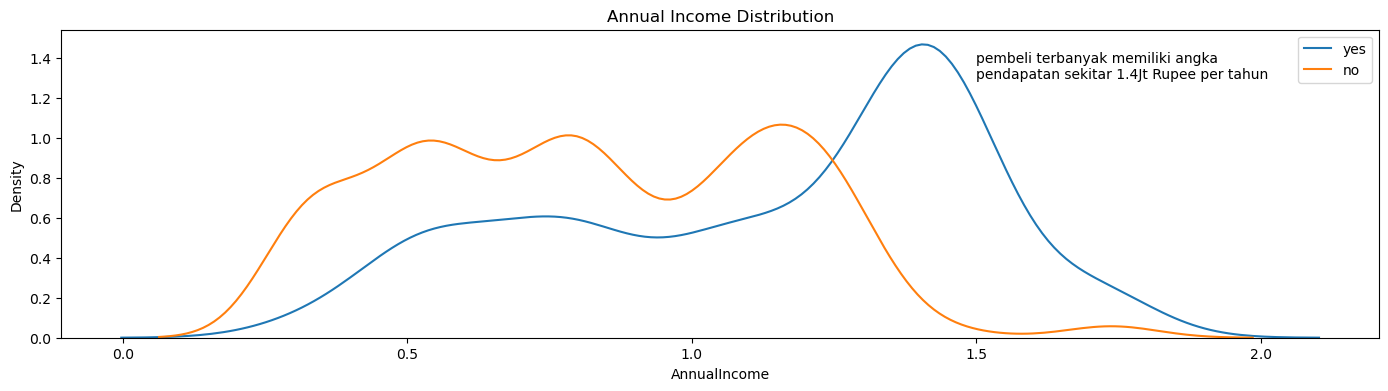

In [2566]:
plt.figure(figsize=(17,4))
sns.kdeplot(yes['AnnualIncome']/1000000,label = 'yes')
sns.kdeplot(no['AnnualIncome']/1000000,label = 'no')
plt.title('Annual Income Distribution')
plt.text(1.5,1.3,'pembeli terbanyak memiliki angka \npendapatan sekitar 1.4Jt Rupee per tahun')
plt.legend()
plt.show()

## FamilyMembers

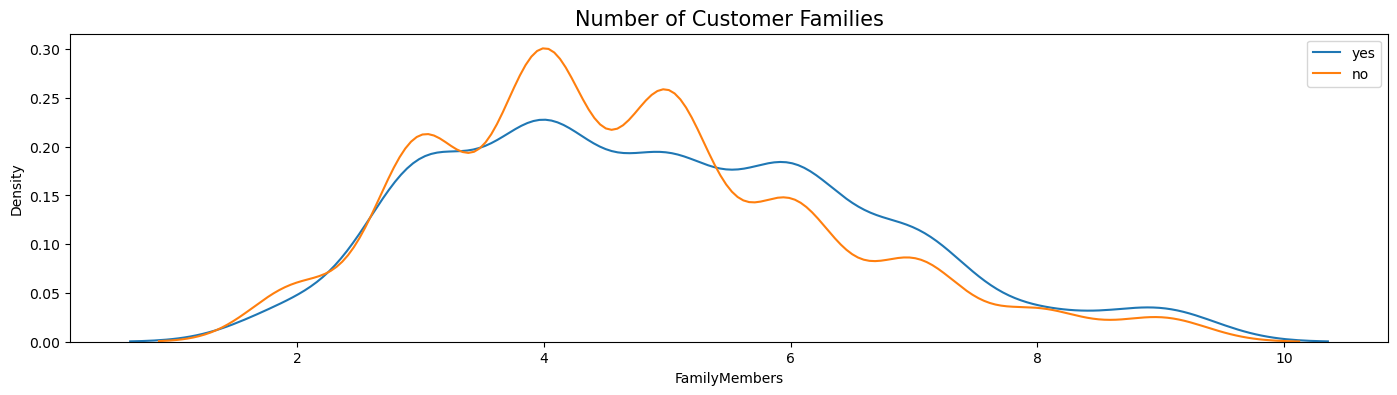

In [2567]:
plt.figure(figsize=(17,4))
sns.kdeplot(yes['FamilyMembers'], label = 'yes')
sns.kdeplot(no['FamilyMembers'], label = 'no')
plt.legend()
plt.title('Number of Customer Families',fontsize=15)
plt.show()

## ChronicDiseases

In [2568]:
dfg = df.groupby(['ChronicDiseases','TravelInsurance'])['Age'].count().reset_index(name= 'User')
dfg_tot = df.groupby(['ChronicDiseases'])['Age'].count().reset_index(name = 'Total')
dfg = dfg.merge(dfg_tot, how = 'inner', on = 'ChronicDiseases')
dfg['ratio'] = dfg['User'] / dfg['Total']
dfg

,ChronicDiseases,TravelInsurance,User,Total,ratio
0,0,0,930,1435,0.648084
1,0,1,505,1435,0.351916
2,1,0,347,552,0.628623
3,1,1,205,552,0.371377


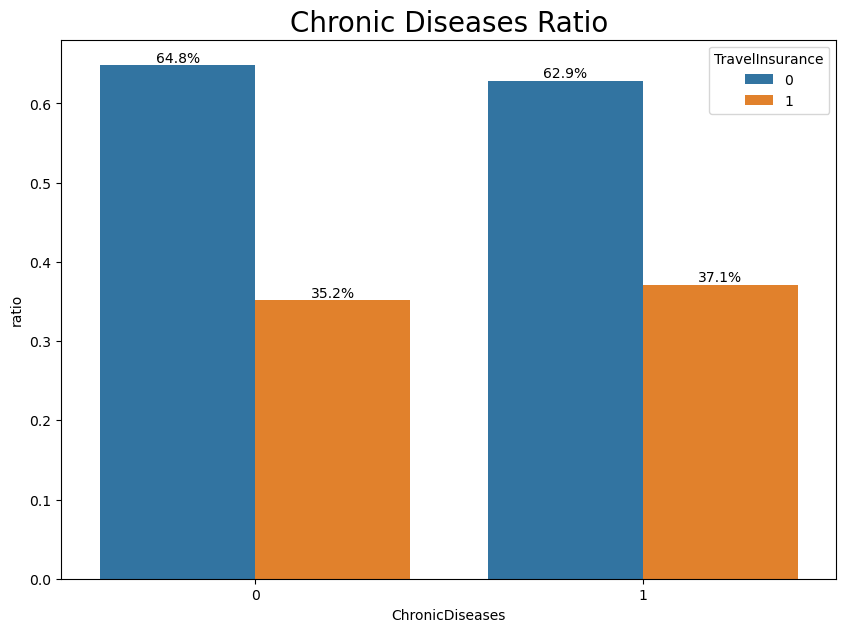

In [2569]:
plt.figure(figsize=(10,7))
for i, bar in enumerate(sns.barplot(x='ChronicDiseases', y='ratio', hue='TravelInsurance', data=dfg).containers):
    for j, value in enumerate(bar):
        percent = value.get_height() * 100
        plt.text(value.get_x() + value.get_width() / 2, value.get_height(), f"{percent:.1f}%", ha='center', va='bottom', fontsize=10)
plt.title('Chronic Diseases Ratio',fontsize=20)
plt.show()

## FrequentFlyer

In [2570]:
dfg = df.groupby(['FrequentFlyer','TravelInsurance'])['Age'].count().reset_index(name= 'User')
dfg_tot = df.groupby(['FrequentFlyer'])['Age'].count().reset_index(name = 'Total')
dfg = dfg.merge(dfg_tot, how = 'inner', on = 'FrequentFlyer')
dfg['ratio'] = dfg['User'] / dfg['Total']
dfg

,FrequentFlyer,TravelInsurance,User,Total,ratio
0,No,0,1099,1570,0.700000
1,No,1,471,1570,0.300000
2,Yes,0,178,417,0.426859
3,Yes,1,239,417,0.573141


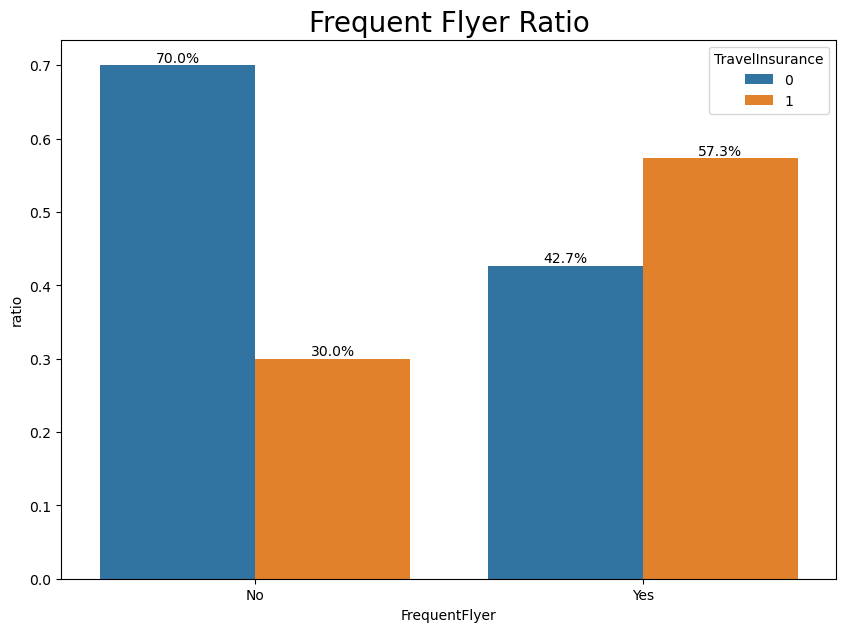

In [2571]:
plt.figure(figsize=(10,7))
for i, bar in enumerate(sns.barplot(x='FrequentFlyer', y='ratio', hue='TravelInsurance', data=dfg).containers):
    for j, value in enumerate(bar):
        percent = value.get_height() * 100
        plt.text(value.get_x() + value.get_width() / 2, value.get_height(), f"{percent:.1f}%", ha='center', va='bottom', fontsize=10)
plt.title('Frequent Flyer Ratio',fontsize=20)
plt.show()

## EverTravelledAbroad

In [2572]:
dfg = df.groupby(['EverTravelledAbroad','TravelInsurance'])['Age'].count().reset_index(name= 'User')
dfg_tot = df.groupby(['EverTravelledAbroad'])['Age'].count().reset_index(name = 'Total')
dfg = dfg.merge(dfg_tot, how = 'inner', on = 'EverTravelledAbroad')
dfg['ratio'] = dfg['User'] / dfg['Total']
dfg

,EverTravelledAbroad,TravelInsurance,User,Total,ratio
0,No,0,1195,1607,0.743622
1,No,1,412,1607,0.256378
2,Yes,0,82,380,0.215789
3,Yes,1,298,380,0.784211


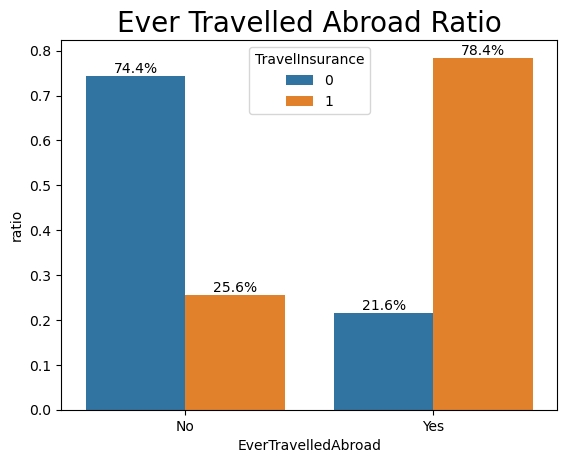

In [2577]:
for i, bar in enumerate(sns.barplot(x='EverTravelledAbroad', y='ratio', hue='TravelInsurance', data=dfg).containers):
    for j, value in enumerate(bar):
        percent = value.get_height() * 100
        plt.text(value.get_x() + value.get_width() / 2, value.get_height(), f"{percent:.1f}%", ha='center', va='bottom', fontsize=10)
plt.title('Ever Travelled Abroad Ratio',fontsize=20,loc='center')
plt.show()

<AxesSubplot:>

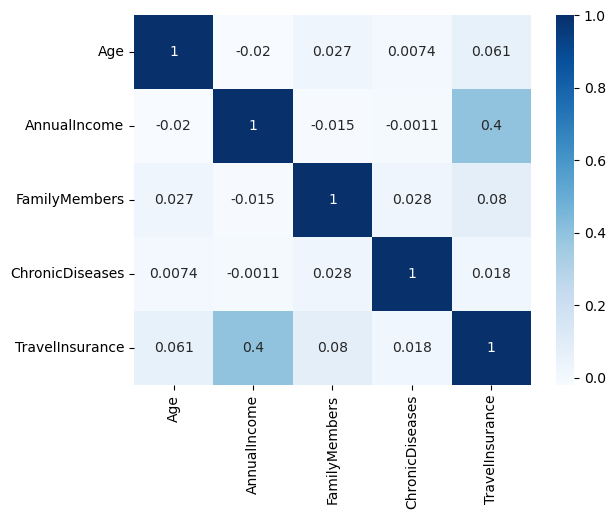

In [2574]:
sns.heatmap(df.corr(), cmap='Blues', annot=True)

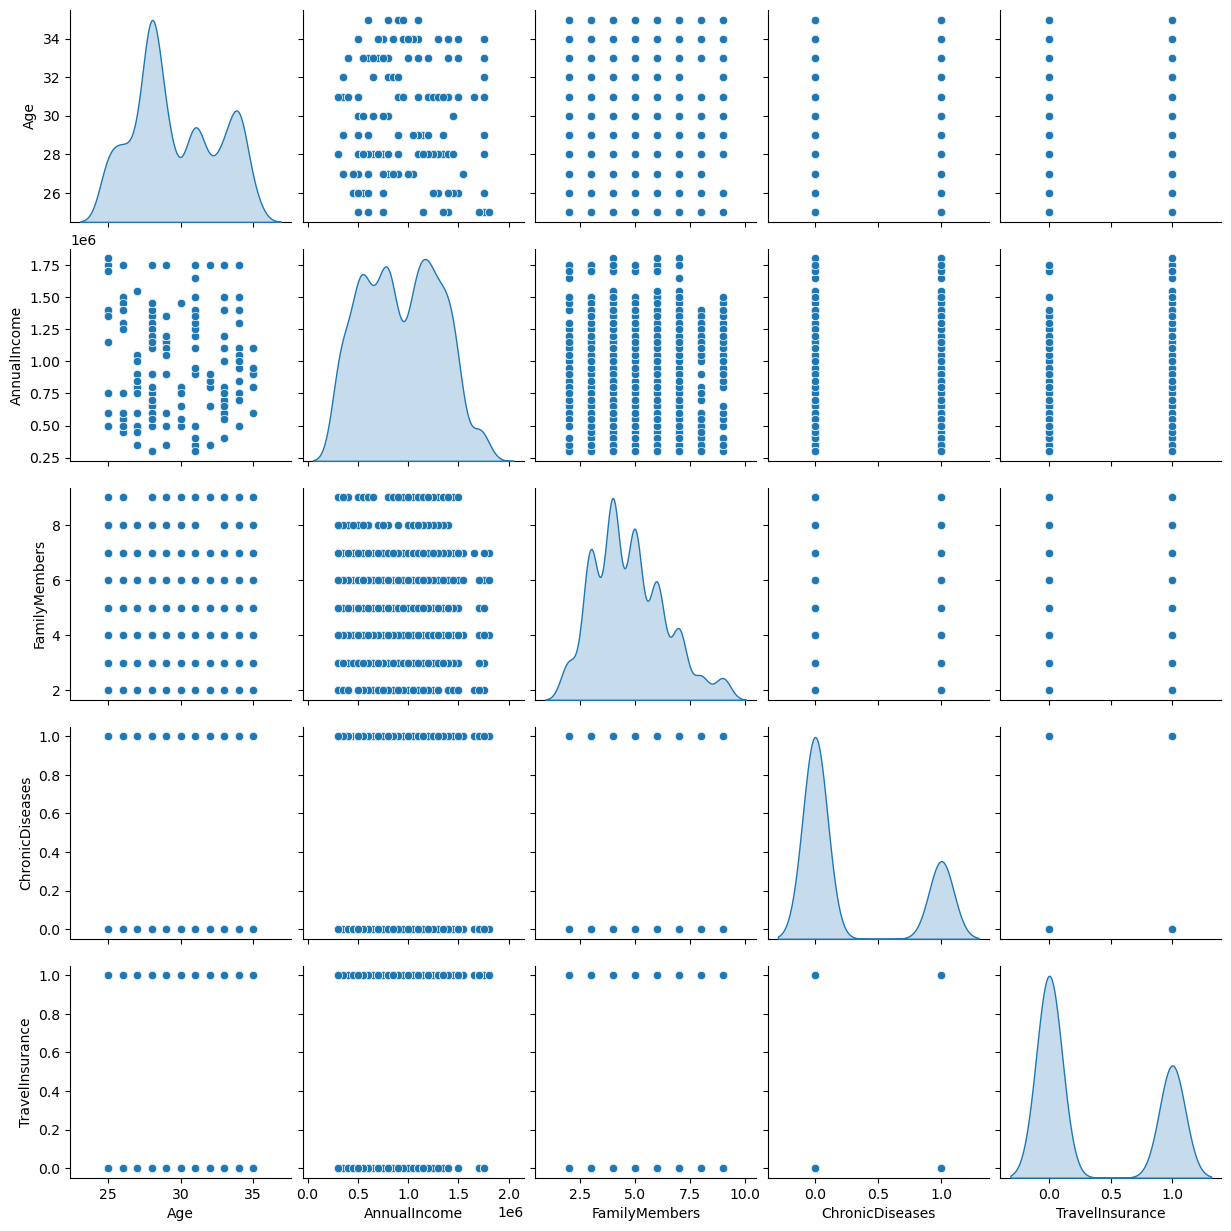

In [2575]:
sns.pairplot(df, diag_kind='kde')